# Amplitude time

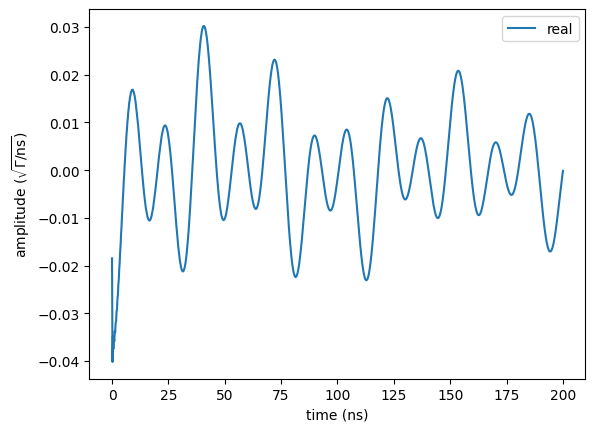

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

iron = nx.Material.Template(nx.lib.material.Fe)

layer_Fe = nx.Layer(id = "Fe layer",
                    material = iron,
                    thickness = 3000)

site = nx.Hyperfine(magnetic_field = 33,
                    isotropic = True)

iron.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

detuning = np.linspace(-200, 200, 1001)

amp_time = nx.AmplitudeTime(experiment = exp,
                            time_length = 200,
                            time_step = 0.2,
                            electronic = False,
                            fft_window = "auto",
                            id = "my amplitude time")

time_axis, amp = amp_time.Calculate()

amp_sigma = amp[:,0]
amp_pi = amp[:,1]

plt.plot(time_axis, np.real(amp_sigma), label = 'real')
#plt.plot(time_axis, np.imag(amp_sigma), label = 'imag')
plt.legend()
plt.xlabel('time (ns)')
plt.ylabel(r'amplitude ($\sqrt{\Gamma / \mathrm{ns}}$)')
plt.show()

In [2]:
amp_time.Plot(polar=True, pi=False, unwrap = False)

In [3]:
amp_time.fft_window = "Hann"

time_axis, amp = amp_time.Calculate()

amp_time.Plot(polar=True, pi=False, unwrap = False)